In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import SimpleRNN , Input,Flatten, LSTM
from tensorflow.keras import backend as K
from keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

2024-12-05 18:03:35.324421: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 18:03:35.325959: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-05 18:03:35.329662: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-05 18:03:35.339734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733450615.355973 2443873 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733450615.36

In [2]:
opened = []

csv_path = '/global/scratch/users/arvalcarcel/CSMUB/RESULTS/CSV/'

masterlist = '/global/scratch/users/arvalcarcel/CSMUB/RESULTS/ALL_STATIONS_FINAL_REVISED3.csv'

stations_df = pd.read_csv(masterlist)
station_num = stations_df['grdc_no']

arrayFile = [os.path.join(csv_path, f"{station_no}.csv") for station_no in station_num]

for file in arrayFile:
  df = pd.read_csv(file, index_col= None, header = 0)
  opened.append(df)

total_df = pd.concat(opened, axis = 0, ignore_index = True)

q = total_df['Q']
swe = total_df['SWE']
scaled = total_df['SWE_scaled']

In [3]:
# Convert q and swe to NumPy arrays
X = scaled.to_numpy()  # This will be 1D: shape (num_samples,)
y = q.to_numpy()

# Reshape X for Conv1D: (num_samples, num_features, channels)
X = X.reshape(len(X), -1, 1)  # Shape becomes (num_samples, 1 feature, 1 channel)
y = y.reshape(len(y), -1, 1)
# Normalize the data
X = X.astype('float32') / np.max(X)  # Scale to [0, 1]
# y = y.astype('float32') / np.max(X)  # Scale to [0, 1]
# print(X)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (7248, 1, 1)
Shape of y: (7248, 1, 1)


In [4]:
# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# # Define activation functions
# def purelin(x):
#     return x
# def logsig(x):
#     return np.log(1/(1+np.exp(-x)))
# def radbas(x):
#     return np.exp(-np.abs(x))

In [6]:
FNN = Sequential()
FNN.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
FNN.add(Dropout(0.2))
FNN.add(Dense(64, activation='relu'))
FNN.add(Dropout(0.2))
FNN.add(Dense(32, activation='relu'))
FNN.add(Dense(1, activation='linear'))  # Assuming regression

FNN.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae','mape'])
historyFNN = FNN.fit(X, y, validation_split=0.2, batch_size=128, epochs=300, verbose=1)

Epoch 1/300


/global/home/users/arvalcarcel/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-05 18:03:38.821596: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 17669176.0000 - mae: 1096.3241 - mape: 3945012.0000 - val_loss: 91322.3672 - val_mae: 87.0603 - val_mape: 350976768.0000
Epoch 2/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18093472.0000 - mae: 1102.1564 - mape: 97724536.0000 - val_loss: 87437.0625 - val_mae: 92.2900 - val_mape: 4642978816.0000
Epoch 3/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18997990.0000 - mae: 1072.8014 - mape: 906000768.0000 - val_loss: 91181.9062 - val_mae: 186.2739 - val_mape: 28200095744.0000
Epoch 4/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20948362.0000 - mae: 1230.3612 - mape: 4631248384.0000 - val_loss: 362436.7812 - val_mae: 571.1764 - val_mape: 99802054656.0000
Epoch 5/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16884974.0000 - mae: 1369.9102 - mape: 13421773824.0000 - val_loss: 1278233.5000 - val_mae: 1112.3645 - val_mape: 191301124096.0000
Epoch 6/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16743636.0000 - mae: 1718.58

In [13]:
zero_y_count = (X_train == 0).sum()
print(zero_y_count)

23


In [7]:
# batch = int((7248*0.8)/12)

# #create model
# FNN = Sequential()

# #add model layers
# FNN.add(Dense(batch, activation = 'relu'))
# # FNN.add(Dense(120, activation = 'relu'))
# FNN.add(Dense(64, activation = 'sigmoid'))
# FNN.add(Dense(32, activation = 'relu'))
# FNN.add(Dense(12, activation = 'relu'))
# FNN.add(Dense(4, activation='linear'))
# # sgd_optimizer = SGD(momentum=0.9)
# FNN.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse','accuracy'])
# historyFNN = FNN.fit(X,y, batch_size=52, epochs=300)

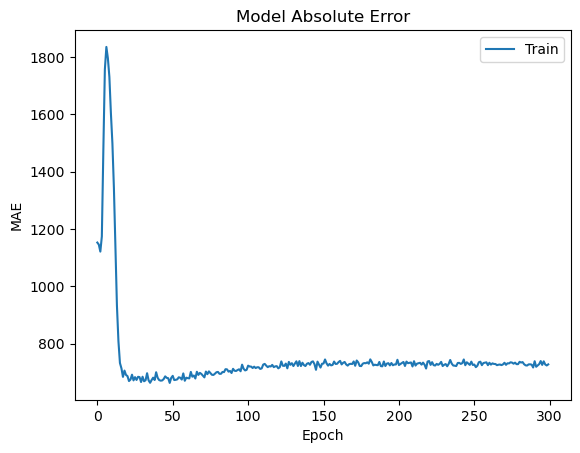

In [8]:
plt.plot(historyFNN.history['mae'])
plt.title('Model Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

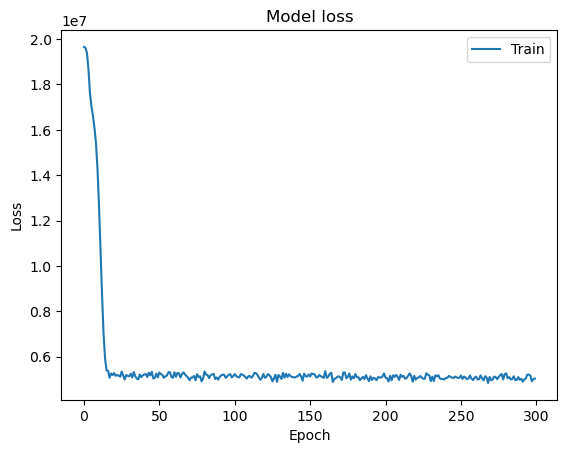

In [9]:
plt.plot(historyFNN.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [10]:
val_loss, val_accuracy = FNN.evaluate(X_val, y_val)
# print(result)

# print(f"Validation Loss: {val_loss}")
# print(f"Validation Accuracy: {val_accuracy}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2698886.7500 - mae: 556.0367 - mape: 5810461696.0000 


ValueError: too many values to unpack (expected 2)

In [ ]:
plt.plot(historyFNN.history['accuracy'],'b')
plt.plot(historyFNN.history['val_accuracy'],'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Make predictions on the validation set
# y_pred = FNN.predict(X_val)
# print(y_pred.size)
# print(X_val.size)
# # Compare predictions with actual values
# plt.plot(y_pred, alpha=0.5)
# plt.title('Predictions vs Actual Values')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.show()

In [ ]:
filename = '/global/scratch/users/arvalcarcel/CSMUB/RESULTS/CNN/rnn_plot.png'
# Ensure the directory exists
os.makedirs(os.path.dirname(filename), exist_ok=True)
from tensorflow.keras.utils import plot_model

# Plot and save the model
plot_model(FNN, to_file=filename, show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image(filename)